In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
 
%matplotlib inline
 
import warnings
warnings.filterwarnings('ignore')

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
#train = pd.read_csv('/content/drive/My Drive/DSN AI Bootcamp Qualification Hackathon/Train.csv')
#test  = pd.read_csv('/content/drive/My Drive/DSN AI Bootcamp Qualification Hackathon/Test.csv')
 
train = pd.read_csv('../input/dsn-ai-bootcamp-data/Train.csv')
test = pd.read_csv('../input/dsn-ai-bootcamp-data/Test.csv')
sub = pd.read_csv('../input/dsn-ai-bootcamp-data/SampleSubmission.csv')

In [4]:
train.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,...,0.392854,2.02,0.711632,0.0,0.0,charge,NaN,1.129518,0.044335,no
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,...,0.314281,8.08,0.183584,NaN,0.0,charge,349.805730,1.620483,0.322436,no
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0,6.282,NaN,956940.0,NaN,192944.0,...,0.162965,18.18,0.791136,0.0,0.0,charge,NaN,1.513370,0.011640,yes
3,Apcnt_1000012,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,...,0.488884,2.02,0.685168,NaN,0.0,charge,89.940100,0.664452,0.082729,no
4,Apcnt_1000016,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,...,0.275000,12.12,0.438168,0.0,0.0,charge,97.887502,1.427891,0.045630,no


In [5]:
test.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50
0,Apcnt_1000032,3236.0,0.34875,10.2006,0.0000,0.0,418564.0,418564.0,418564.0,540710.0,...,NaN,0.825000,1.01,0.800000,NaN,0.0,charge,NaN,0.000000,0.011221
1,Apcnt_1000048,3284.0,1.27360,2.9606,9.0198,0.0,0.0,9858816.0,49014.0,1510098.0,...,18.8415,0.507694,4.04,0.623248,1.0,0.0,lending,NaN,0.504974,0.043525
2,Apcnt_1000052,NaN,0.27505,0.0600,0.0000,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.00,NaN,NaN,NaN,charge,NaN,0.000000,NaN
3,Apcnt_1000076,3232.0,0.28505,2.8032,0.0000,0.0,0.0,473802.0,473802.0,1724437.0,...,NaN,0.916663,2.02,0.464224,NaN,NaN,charge,90.163742,0.788809,0.104029
4,Apcnt_1000080,3466.0,2.09545,0.8318,2.5182,0.0,19839.0,1150662.0,1150662.0,7860523.0,...,NaN,0.234047,23.23,0.726688,0.0,0.0,lending,1303.587148,1.637733,0.163124


In [6]:
sub.head()

,Applicant_ID,default_status
0,Apcnt_1000032,1
1,Apcnt_1000048,1
2,Apcnt_1000052,1
3,Apcnt_1000076,1
4,Apcnt_1000080,1


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Applicant_ID    56000 non-null  object 
 1   form_field1     53471 non-null  float64
 2   form_field2     52156 non-null  float64
 3   form_field3     55645 non-null  float64
 4   form_field4     55645 non-null  float64
 5   form_field5     55645 non-null  float64
 6   form_field6     42640 non-null  float64
 7   form_field7     50837 non-null  float64
 8   form_field8     42640 non-null  float64
 9   form_field9     47992 non-null  float64
 10  form_field10    55645 non-null  float64
 11  form_field11    24579 non-null  float64
 12  form_field12    46105 non-null  float64
 13  form_field13    50111 non-null  float64
 14  form_field14    56000 non-null  int64  
 15  form_field15    33525 non-null  float64
 16  form_field16    42964 non-null  float64
 17  form_field17    44849 non-null 

In [8]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Applicant_ID    24000 non-null  object
 1   default_status  24000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 375.1+ KB


In [9]:
train.describe()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field48,form_field49,form_field50
count,53471.000000,52156.000000,55645.000000,55645.000000,55645.000000,4.264000e+04,5.083700e+04,4.264000e+04,4.799200e+04,5.564500e+04,...,12271.000000,17771.000000,54677.000000,55432.000000,50617.000000,24683.000000,40096.000000,3.511100e+04,55645.000000,4.494400e+04
mean,3491.795665,0.550737,1.052225,0.851979,1.956317,6.244479e+05,6.865210e+06,2.626690e+06,1.316002e+07,1.185585e+07,...,147.797977,108.117363,0.368215,6.634511,0.563377,0.072520,0.095371,3.052449e+05,1.049061,6.005862e+05
std,188.462426,0.820979,2.147768,3.157692,10.512396,1.433422e+06,1.912729e+07,3.927355e+06,1.977963e+07,2.669459e+07,...,45.085889,36.765769,0.412858,6.378946,0.196973,0.291146,0.335210,1.647757e+06,1.806160,5.842405e+06
min,2990.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.021000,0.000000,0.000000,0.000000,0.048528,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,3358.000000,0.070788,0.000000,0.000000,0.000000,1.400400e+04,6.869740e+05,1.929440e+05,1.368502e+06,4.500730e+05,...,136.191750,87.055500,0.000000,2.020000,0.411672,0.000000,0.000000,7.710079e+01,0.000000,4.560141e-02
50%,3484.000000,0.267575,0.062000,0.000000,0.000000,1.155330e+05,2.704328e+06,9.639420e+05,5.506295e+06,3.707559e+06,...,150.000000,118.441500,0.220000,5.050000,0.588648,0.000000,0.000000,3.181243e+02,0.000000,1.703996e-01
75%,3620.000000,0.719512,1.282000,0.000000,0.000000,5.259280e+05,6.993831e+06,3.751516e+06,1.694552e+07,1.326101e+07,...,167.754000,137.496750,0.628573,10.100000,0.753840,0.000000,0.000000,1.153022e+03,1.181754,4.993370e-01
max,3900.000000,18.015050,57.371600,91.672200,407.748600,5.313546e+07,2.158794e+09,1.037397e+08,3.200533e+08,2.191361e+09,...,645.450000,255.000000,2.200000,91.910000,0.800000,5.000000,5.000000,5.321014e+07,28.000000,2.307571e+08


In [10]:
train.duplicated().sum()

0

In [11]:
def missing(df):
    missing_values = pd.DataFrame({'Number of missing values': df.isnull().sum(),
                                  'Percentage of missing values': df.isnull().sum()/len(df) * 100
                                  })
    return missing_values

In [12]:
missing(train)

,Number of missing values,Percentage of missing values
Applicant_ID,0,0.000000
form_field1,2529,4.516071
form_field2,3844,6.864286
form_field3,355,0.633929
form_field4,355,0.633929
form_field5,355,0.633929
form_field6,13360,23.857143
form_field7,5163,9.219643
form_field8,13360,23.857143
form_field9,8008,14.300000


In [13]:
num_cols = train.select_dtypes(exclude='object').columns
len(num_cols)

49

In [14]:
train.form_field47.value_counts()

charge     36373
lending    19627
Name: form_field47, dtype: int64

In [15]:
train.default_status.value_counts()

no     42285
yes    13715
Name: default_status, dtype: int64

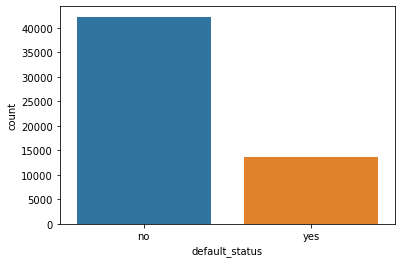

In [16]:
sns.countplot(train.default_status)

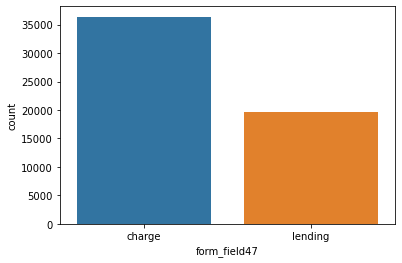

In [17]:
sns.countplot(train.form_field47)

In [18]:
def boxplot(df):
    for col in num_cols:
        plt.title('Boxplot of '+ col)
        sns.boxplot(df[col])
        plt.show()
        

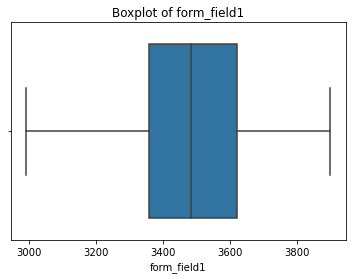

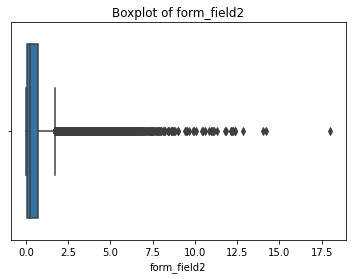

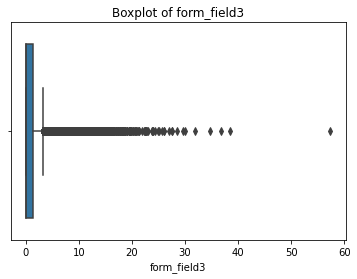

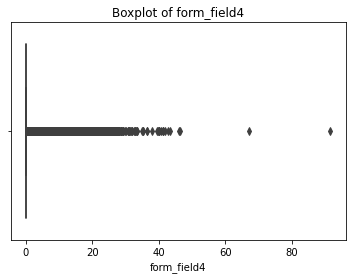

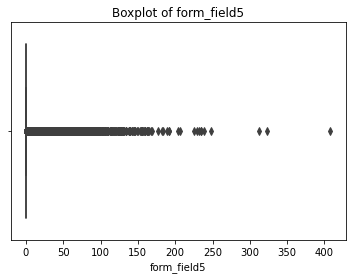

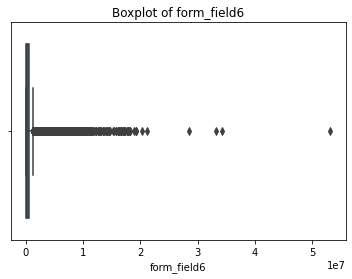

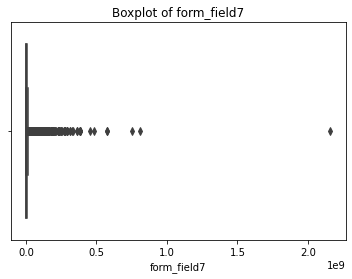

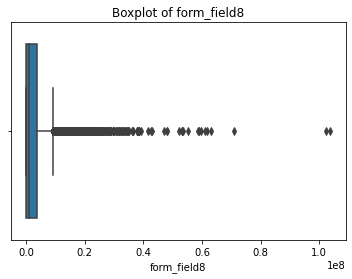

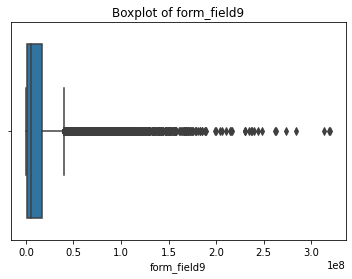

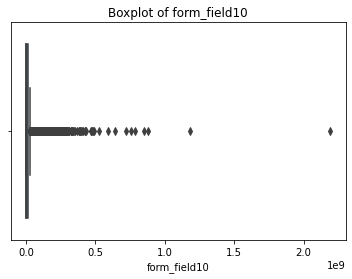

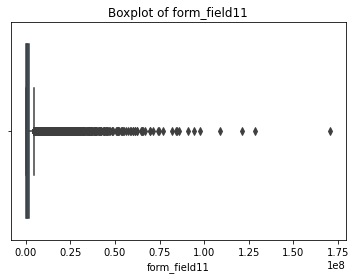

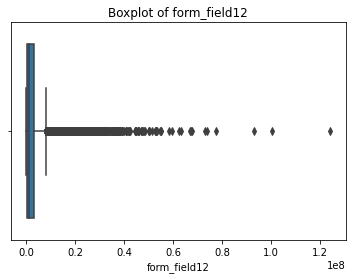

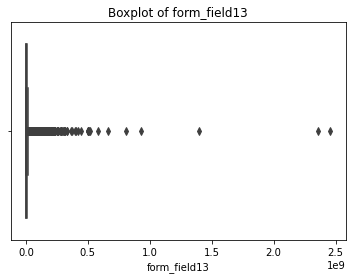

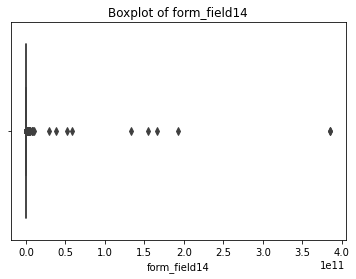

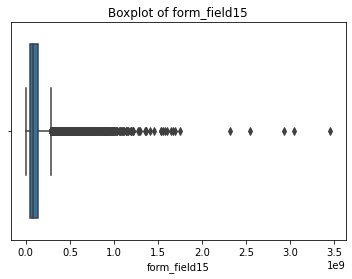

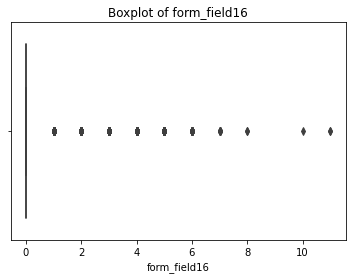

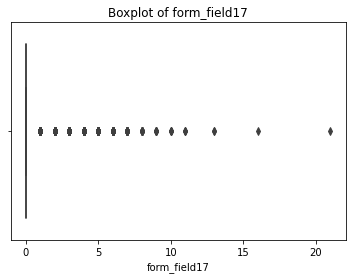

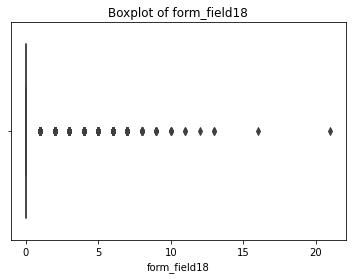

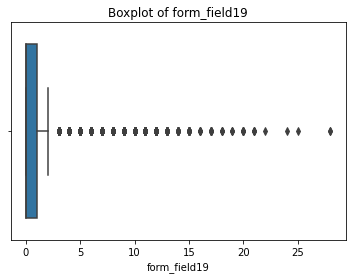

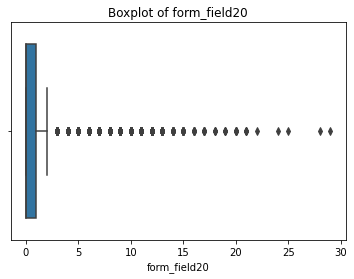

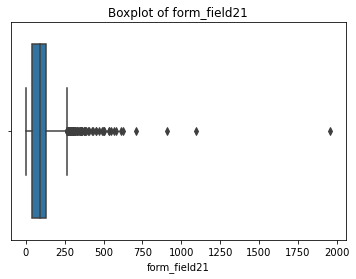

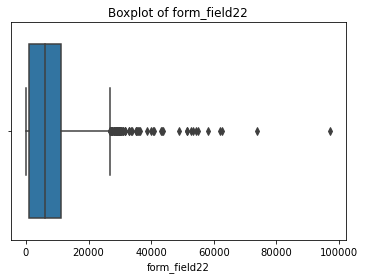

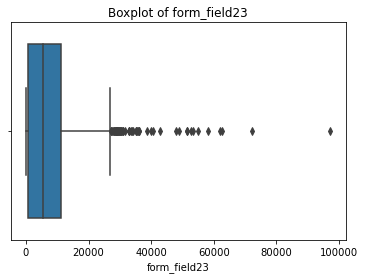

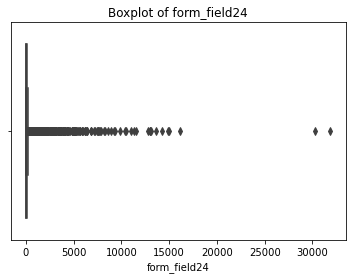

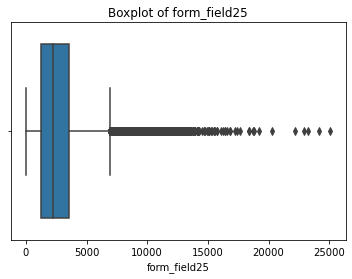

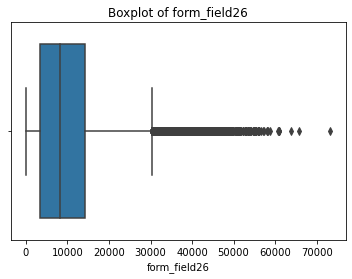

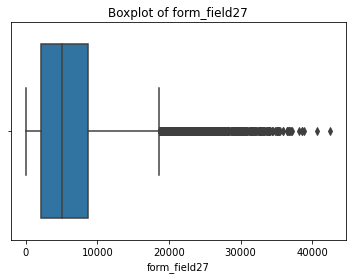

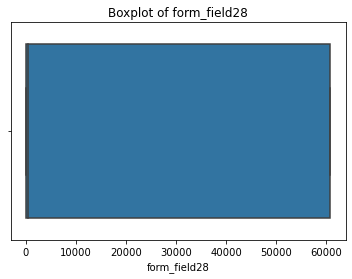

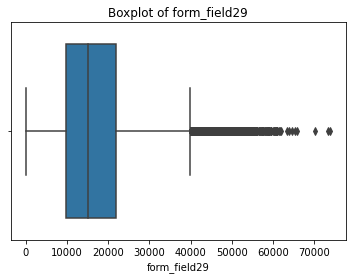

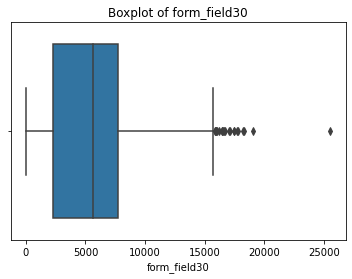

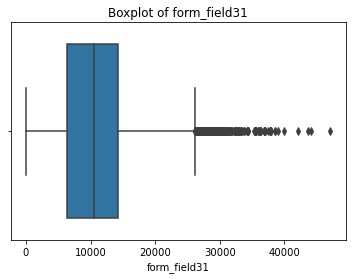

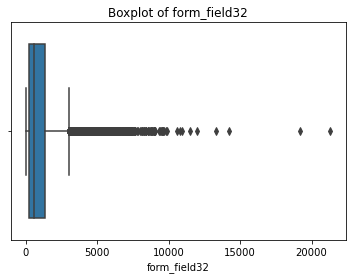

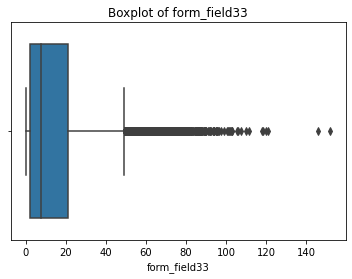

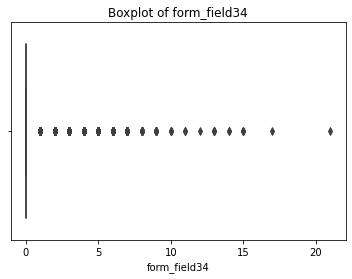

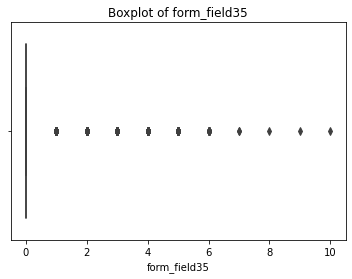

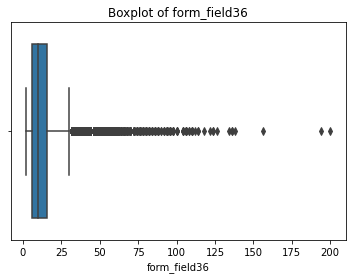

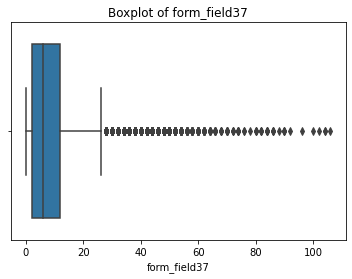

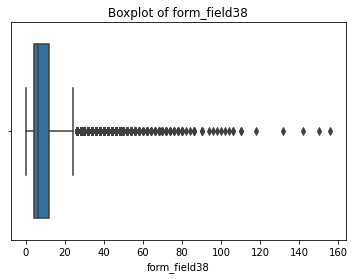

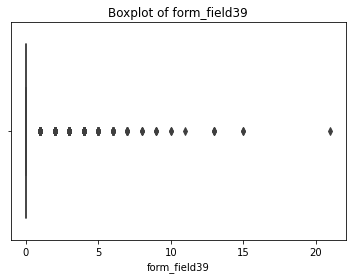

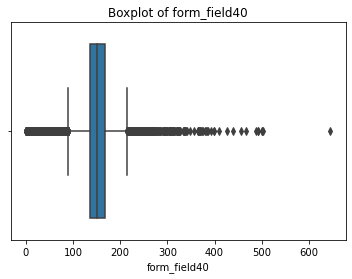

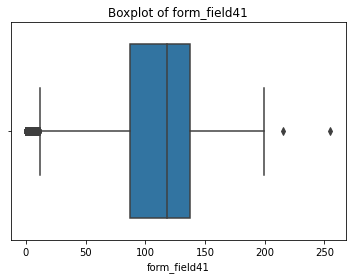

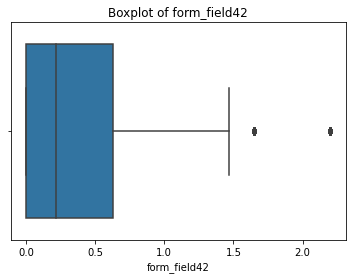

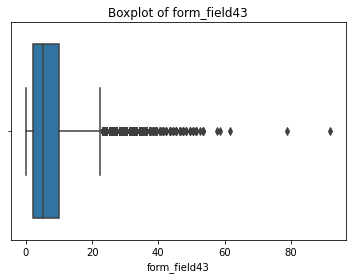

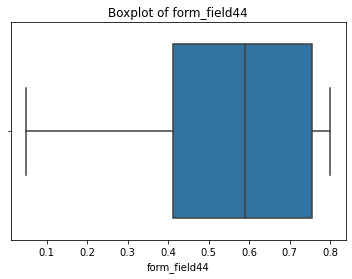

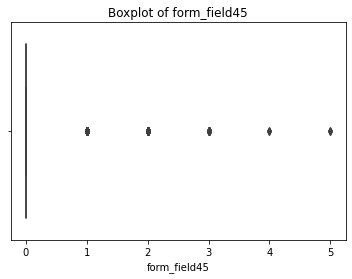

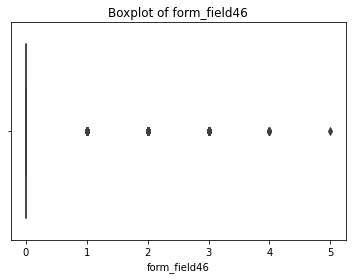

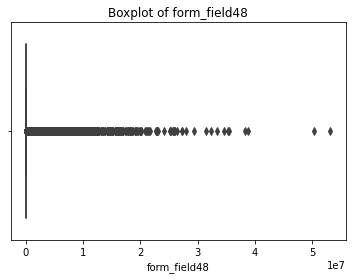

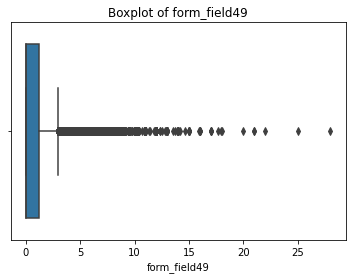

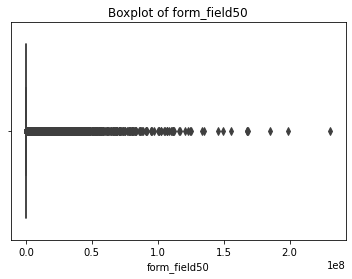

In [19]:
boxplot(train)

In [20]:
def distribution(df):
    for col in num_cols:
        plt.title('Distribution of '+ col)
        df[col].hist()
        plt.show()

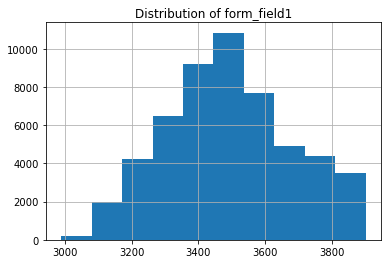

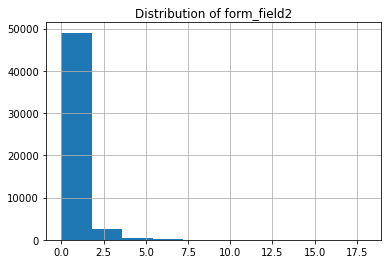

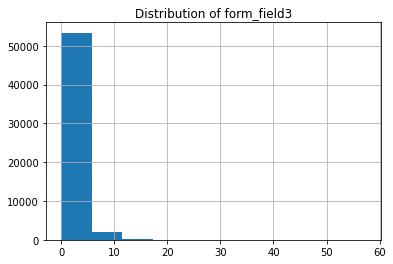

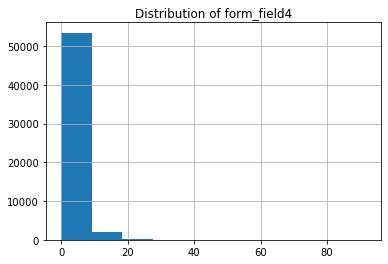

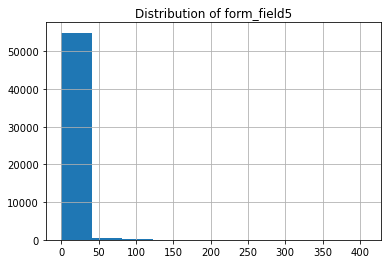

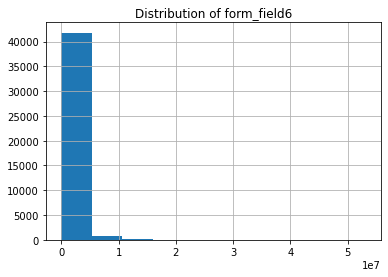

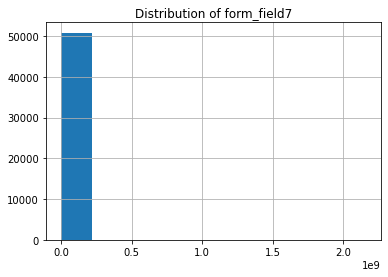

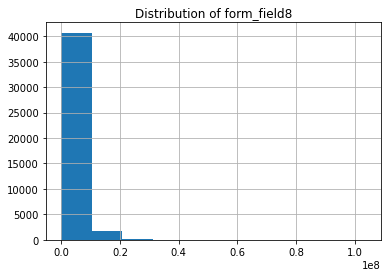

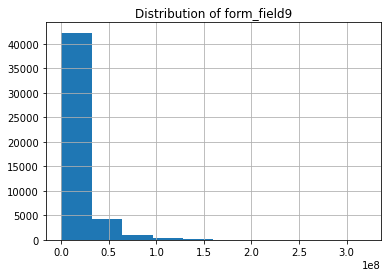

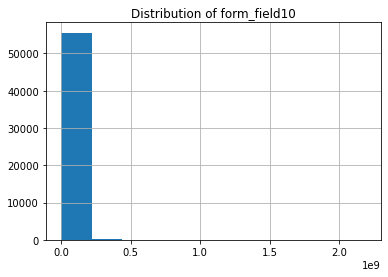

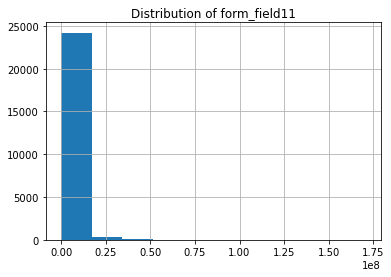

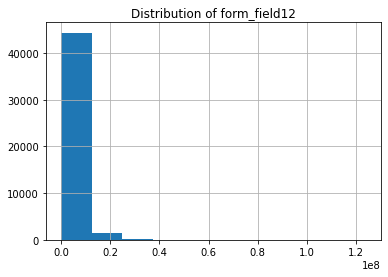

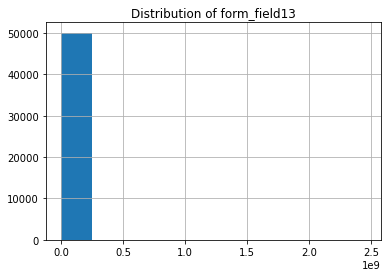

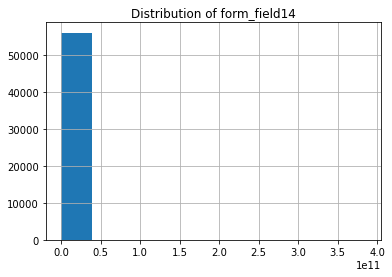

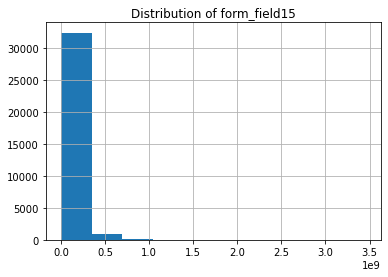

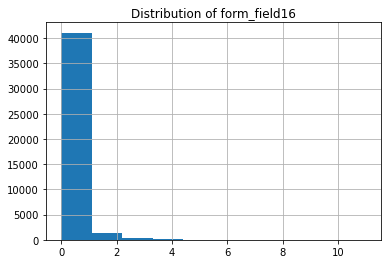

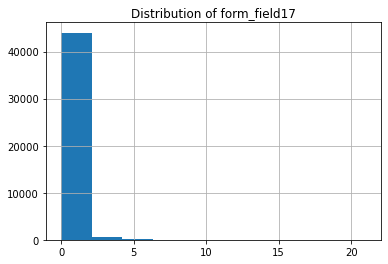

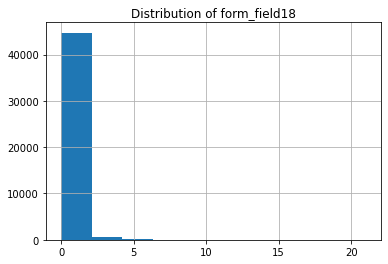

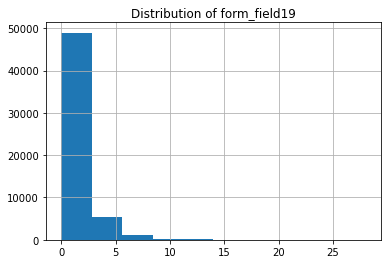

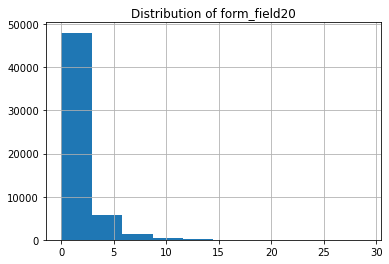

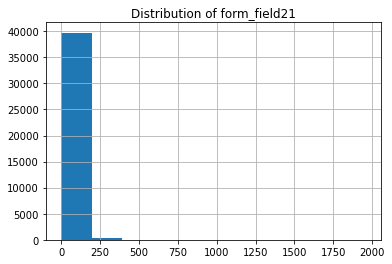

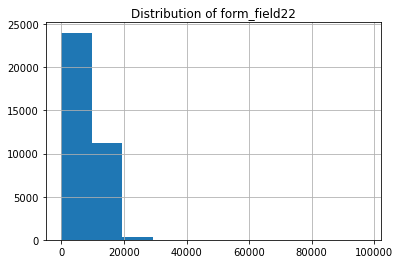

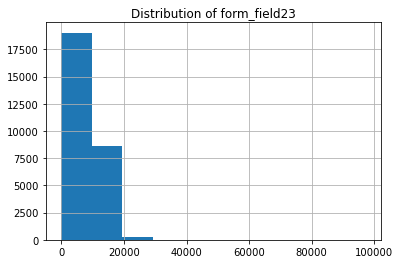

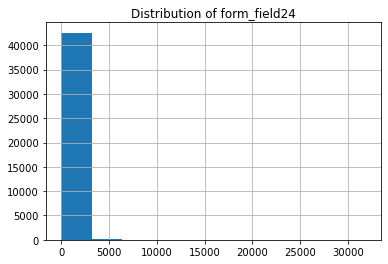

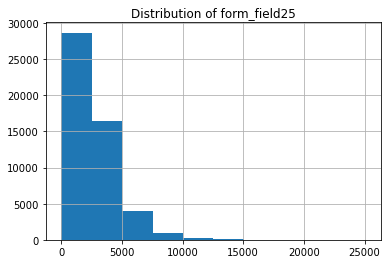

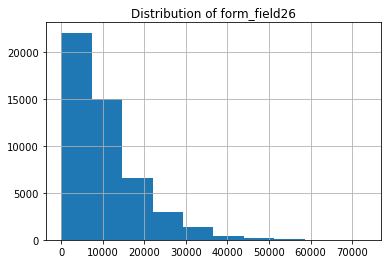

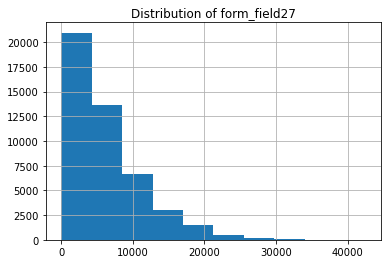

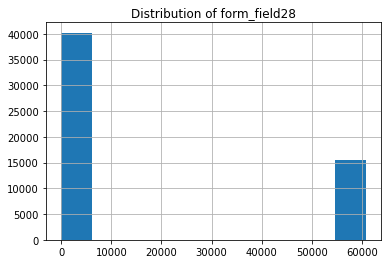

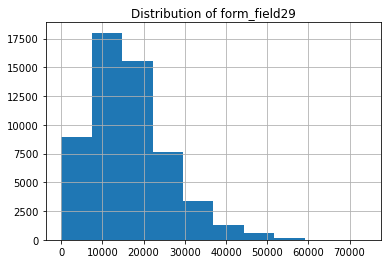

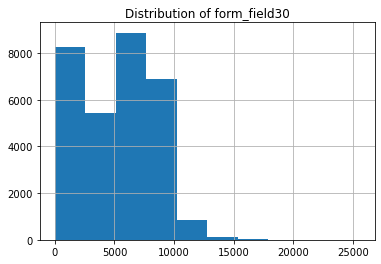

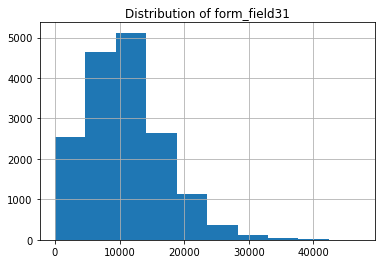

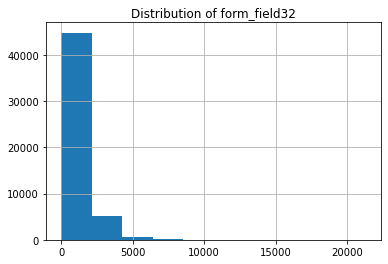

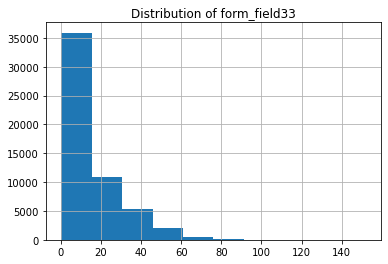

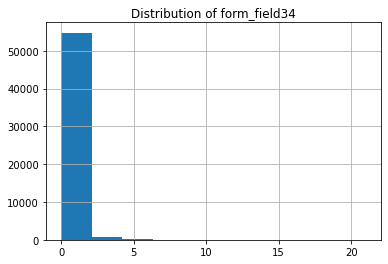

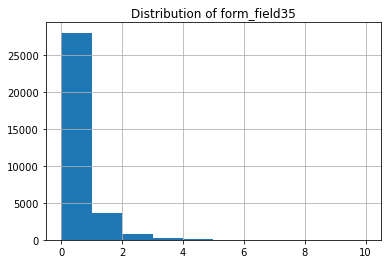

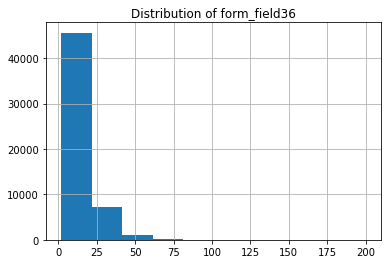

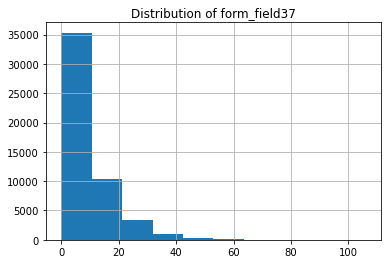

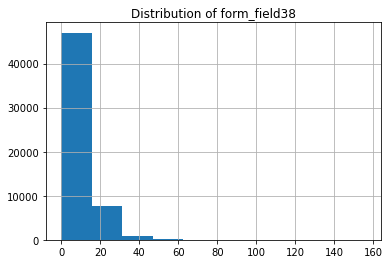

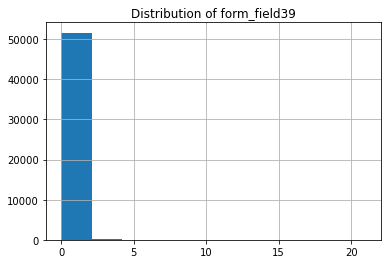

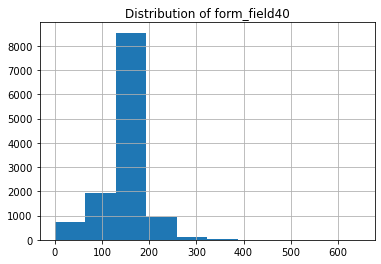

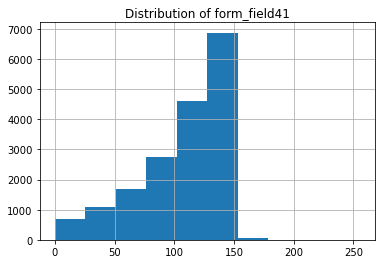

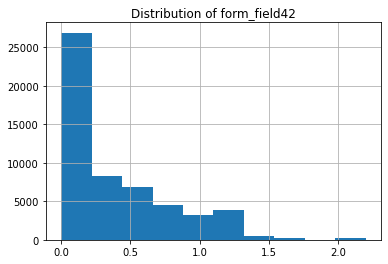

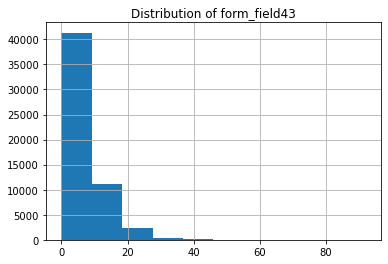

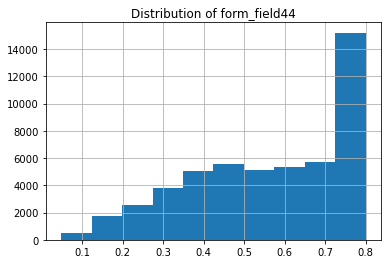

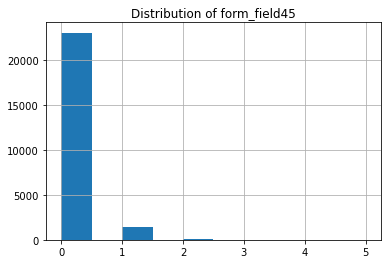

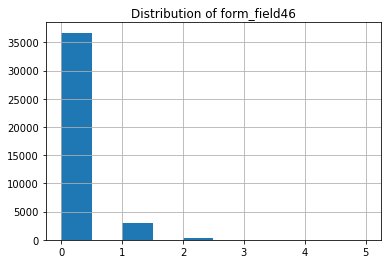

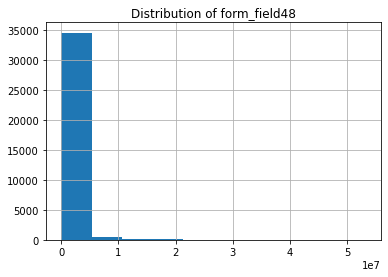

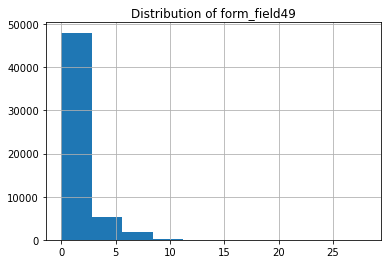

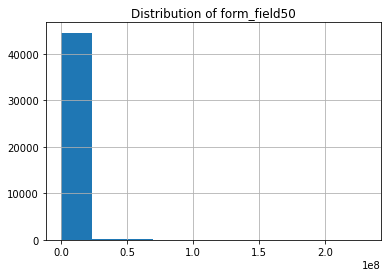

In [21]:
distribution(train)

In [22]:
def fill_na(df1, df2):
    for col in num_cols:
        df1.fillna(-999, inplace=True)
        df2.fillna(-999, inplace=True)

In [23]:
fill_na(train, test)

In [24]:

print(missing(test))
missing(train)

              Number of missing values  Percentage of missing values
Applicant_ID                         0                           0.0
form_field1                          0                           0.0
form_field2                          0                           0.0
form_field3                          0                           0.0
form_field4                          0                           0.0
form_field5                          0                           0.0
form_field6                          0                           0.0
form_field7                          0                           0.0
form_field8                          0                           0.0
form_field9                          0                           0.0
form_field10                         0                           0.0
form_field11                         0                           0.0
form_field12                         0                           0.0
form_field13                      

,Number of missing values,Percentage of missing values
Applicant_ID,0,0.0
form_field1,0,0.0
form_field2,0,0.0
form_field3,0,0.0
form_field4,0,0.0
form_field5,0,0.0
form_field6,0,0.0
form_field7,0,0.0
form_field8,0,0.0
form_field9,0,0.0


In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [26]:
def encoder(df1, df2, col):
    df1[col] = le.fit_transform(df1[col])
    df2[col] = le.fit_transform(df2[col])
    
    

In [27]:
encoder(train, test, 'form_field47')
#encoder(train, _, 'default_status')

In [28]:
train.default_status = le.fit_transform(train.default_status)

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Applicant_ID    56000 non-null  object 
 1   form_field1     56000 non-null  float64
 2   form_field2     56000 non-null  float64
 3   form_field3     56000 non-null  float64
 4   form_field4     56000 non-null  float64
 5   form_field5     56000 non-null  float64
 6   form_field6     56000 non-null  float64
 7   form_field7     56000 non-null  float64
 8   form_field8     56000 non-null  float64
 9   form_field9     56000 non-null  float64
 10  form_field10    56000 non-null  float64
 11  form_field11    56000 non-null  float64
 12  form_field12    56000 non-null  float64
 13  form_field13    56000 non-null  float64
 14  form_field14    56000 non-null  int64  
 15  form_field15    56000 non-null  float64
 16  form_field16    56000 non-null  float64
 17  form_field17    56000 non-null 

In [30]:
features = train.select_dtypes(exclude='object').drop(columns=['default_status']).columns
len(features), train.shape

(50, (56000, 52))

In [31]:
features1 = train.select_dtypes(exclude='object').drop(columns=['default_status', 'form_field48', 'form_field49']).columns


In [32]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 51 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Applicant_ID  24000 non-null  object 
 1   form_field1   24000 non-null  float64
 2   form_field2   24000 non-null  float64
 3   form_field3   24000 non-null  float64
 4   form_field4   24000 non-null  float64
 5   form_field5   24000 non-null  float64
 6   form_field6   24000 non-null  float64
 7   form_field7   24000 non-null  float64
 8   form_field8   24000 non-null  float64
 9   form_field9   24000 non-null  float64
 10  form_field10  24000 non-null  float64
 11  form_field11  24000 non-null  float64
 12  form_field12  24000 non-null  float64
 13  form_field13  24000 non-null  float64
 14  form_field14  24000 non-null  int64  
 15  form_field15  24000 non-null  float64
 16  form_field16  24000 non-null  float64
 17  form_field17  24000 non-null  float64
 18  form_field18  24000 non-nu

In [33]:
#pip install catboost

In [34]:
from sklearn.metrics import roc_auc_score
from catboost import CatBoostClassifier

In [35]:
#from sklearn.cluster import KMeans

In [36]:
#kmeans = KMeans(random_state = 42, n_clusters=2)

In [37]:
#train_ = train[features]
#kmeans.fit(train_)
#y_pred = kmeans.predict(train_)

In [38]:
#train['cluster'] =y_pred
#train.cluster.value_counts()

In [39]:
#clusters = pd.DataFrame()
#clusters['cluster_range'] = range(1, 10)
#inertia = []

In [40]:
#for k in clusters['cluster_range']:
#    kmeans = KMeans(n_clusters=k, random_state=8).fit(train_)
#    inertia.append(kmeans.inertia_)

In [41]:
#clusters['inertia'] = inertia
#clusters

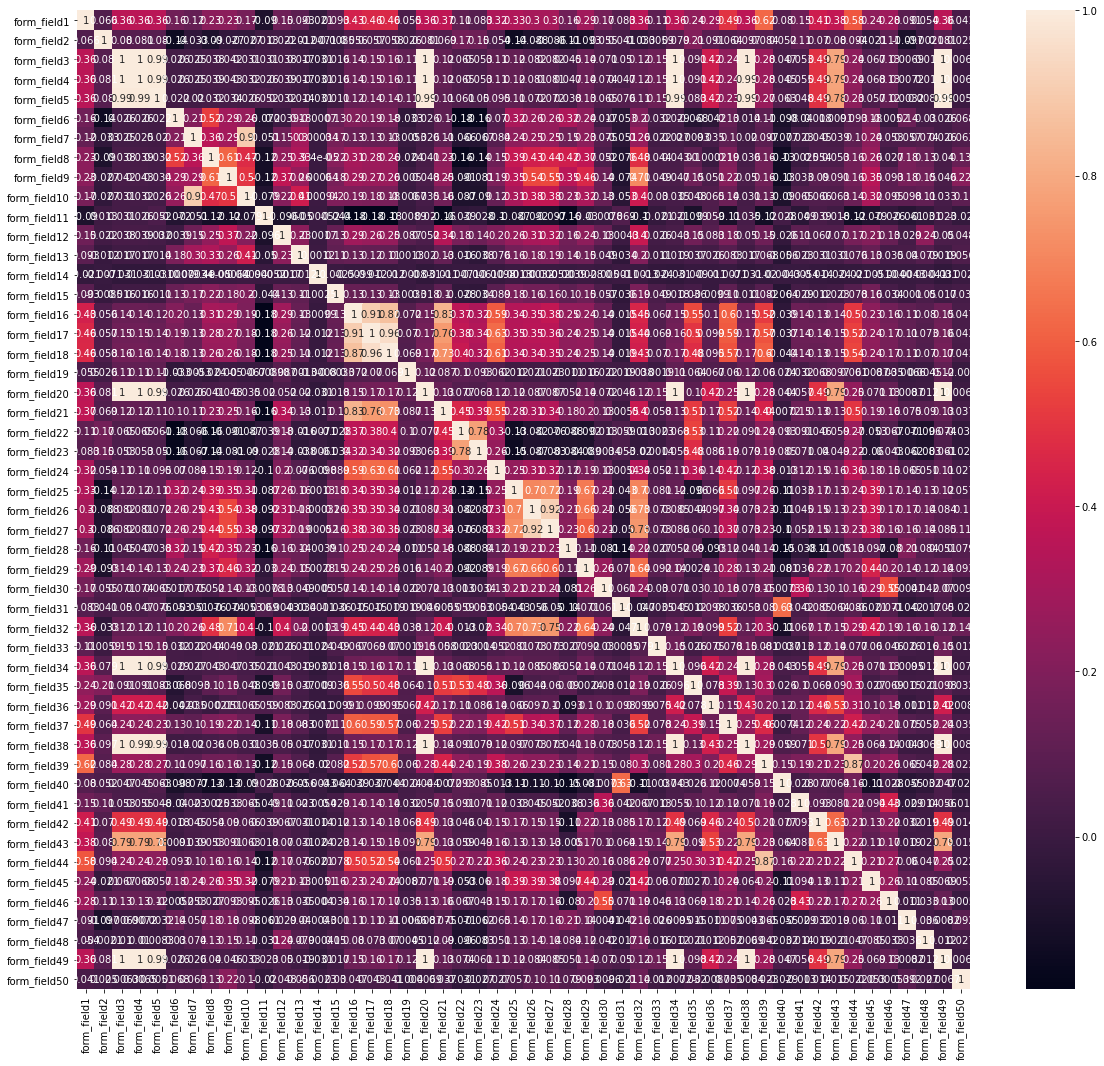

In [42]:
plt.figure(figsize=(20,18))
sns.heatmap(train[features].corr(), annot = True)

In [43]:
#plt.plot(clusters.cluster_range,  clusters.inertia)
#plt.show()

In [44]:
X = train[features]
y = train['default_status']

In [45]:
from sklearn.model_selection import StratifiedKFold

In [46]:
def eval_metric(y, pred):
    return roc_auc_score(y, pred, labels=[0, 1])

In [47]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [48]:
#cat =CatBoostClassifier( task_type='GPU',random_seed = 42, early_stopping_rounds=200, n_estimators=4000)

In [49]:
#params = {'max_depth':[7,8],
    
 #   'learning_rate': [0.01,0.008],}
    

In [50]:
#gscv = GridSearchCV(cat, params, cv=5)

In [51]:
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, stratify=y, random_state=200)

In [52]:
#model = gscv.fit(X_train, y_train)

In [53]:
#y_pred = gscv.predict_proba(X_test)[:,1]

#eval_metric(y_test, y_pred)

In [54]:
#pred = gscv.predict_proba(test[num_cols])[:,1]
#sub.default_status = pred

In [55]:
#sub.to_csv('submit20.csv', index=False)

In [56]:
#gscv.best_params_

In [57]:
# Specify number of folds
folds = 10
skf = StratifiedKFold(folds)
 


In [58]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [59]:
#XGBClassifier?

In [60]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier

In [61]:
#cat = CatBoostClassifier(**params, task_type='GPU',random_seed = i)
#cat1 = CatBoostClassifier()
#model = StackingClassifier(estimators=[('cat',CatBoostClassifier(**params, task_type='GPU',random_seed = i)), ('cat1',cat1)])

In [62]:
cat_params = {'max_depth':8,
    'n_estimators': 4000,
    'learning_rate': 0.01,
    'objective': 'CrossEntropy',
      'eval_metric':'AUC',
    
    'early_stopping_rounds': 200,
   #'use_best_model': True,
}

In [63]:
xgb_params = {'learning_rate' : 0.01,
                          'max_depth' : 8, 
                          'n_estimators' : 4000,
                          
                          'tree_method' :'gpu_hist', 'gpu_id': 0,
                          'verbosity' : 0, 'booster' : 'gbtree'}

### XGB Tuned 

In [64]:
score_list = []
score = 0
test_oofs = []
 
for i, (train_index, val_index) in enumerate(skf.split(X, y)):
    
    X_train, y_train = X.loc[train_index, features], y.loc[train_index]
    X_val, y_val = X.loc[val_index, features], y.loc[val_index]
 
    #model = CatBoostClassifier(**params, task_type='GPU',random_seed = i, verbose=0)
   # model = AdaBoostClassifier(base_estimator=CatBoostClassifier( task_type='GPU',random_seed = i))
    #model = StackingClassifier(estimators=[('cat',CatBoostClassifier(**params, task_type='GPU',random_seed = i)), ('cat1',CatBoostClassifier(task_type='GPU',random_seed = i))])    
    model = XGBClassifier(**xgb_params, 
                           random_state=i
                          )
    #model = StackingClassifier([('cat', cat), ('xgb', xgb), ('lgb', lgb)])                          
    #model = XGBClassifier()
    model.fit(X_train, y_train)
    #model.fit(xtrain, ytrain)
    
    
    p = model.predict_proba(X_val)[:, 1]
    sc = eval_metric(y_val, p)
    score_list.append(sc)
    score += sc/folds
    
    pred = model.predict_proba(test[features])[:, 1]
    test_oofs.append(pred)
 
    print('Fold {} : {}'.format(i, sc))
 
print()
print()
print('Avg log : ', score)

Fold 0 : 0.8248521591822224
Fold 1 : 0.8374116650359205
Fold 2 : 0.8292896690024887
Fold 3 : 0.8212512368576598
Fold 4 : 0.8338863727735916
Fold 5 : 0.8362204558806898
Fold 6 : 0.8086326130668513
Fold 7 : 0.8279660999418013
Fold 8 : 0.8455532807798076
Fold 9 : 0.8372837545614272


Avg log :  0.8302347307082459


In [65]:
oof_prediction = pd.DataFrame(test_oofs).T
oof_prediction.columns = ['fold_'+ str(i) for i in range(1, folds + 1)]
sub['default_status'] = np.mean(test_oofs, axis = 0)
sub.to_csv('model.csv', index = False)


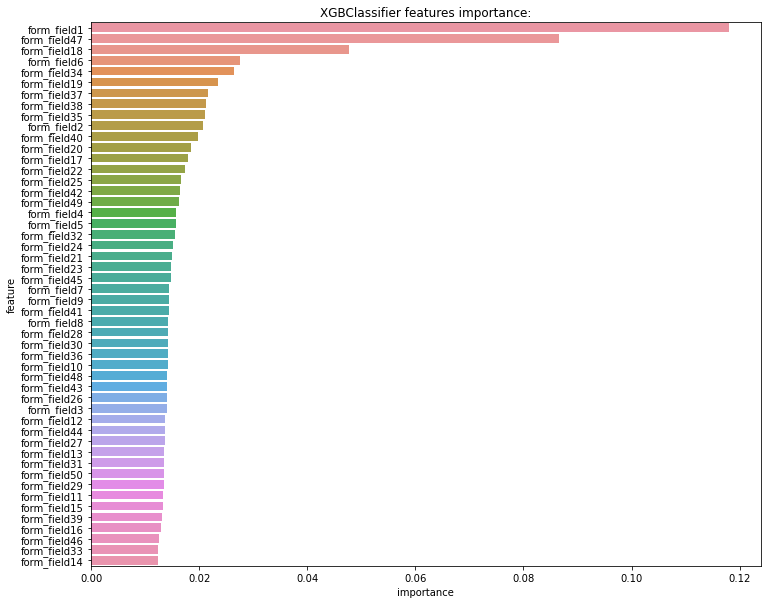

In [66]:
feature_importance_df = pd.DataFrame(model.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = features

plt.figure(figsize=(12, 10));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(50))
plt.title('XGBClassifier features importance:');

### Normal XGB without tuning

In [67]:
score_list = []
score = 0
test_oofs = []
 
for i, (train_index, val_index) in enumerate(skf.split(X, y)):
    
    X_train, y_train = X.loc[train_index, features], y.loc[train_index]
    X_val, y_val = X.loc[val_index, features], y.loc[val_index]
 
    #model = CatBoostClassifier(**params, task_type='GPU',random_seed = i, verbose=0)
   # model = AdaBoostClassifier(base_estimator=CatBoostClassifier( task_type='GPU',random_seed = i))
    #model = StackingClassifier(estimators=[('cat',CatBoostClassifier(**params, task_type='GPU',random_seed = i)), ('cat1',CatBoostClassifier(task_type='GPU',random_seed = i))])    
    model1 = XGBClassifier( tree_method ='gpu_hist', gpu_id= 0,
                          verbosity =0, booster ='gbtree',
                           random_state=i
                          )
    #model = StackingClassifier([('cat', cat), ('xgb', xgb), ('lgb', lgb)])                          
    #model = XGBClassifier()
    model1.fit(X_train, y_train)
    #model.fit(xtrain, ytrain)
    
    
    p = model1.predict_proba(X_val)[:, 1]
    sc = eval_metric(y_val, p)
    score_list.append(sc)
    score += sc/folds
    
    pred = model1.predict_proba(test[features])[:, 1]
    test_oofs.append(pred)
 
    print('Fold {} : {}'.format(i, sc))
 
print()
print()
print('Avg log : ', score)

Fold 0 : 0.8207622716890548
Fold 1 : 0.833294957760136
Fold 2 : 0.8268375129937966
Fold 3 : 0.8213352319324783
Fold 4 : 0.8304588735449837
Fold 5 : 0.8273051584466736
Fold 6 : 0.8028311878880487
Fold 7 : 0.8304372177983237
Fold 8 : 0.8415652211688839
Fold 9 : 0.8363927592255986


Avg log :  0.8271220392447978


In [68]:
oof_prediction = pd.DataFrame(test_oofs).T
oof_prediction.columns = ['fold_'+ str(i) for i in range(1, folds + 1)]
sub['default_status'] = np.mean(test_oofs, axis = 0)
sub.to_csv('model1.csv', index = False)


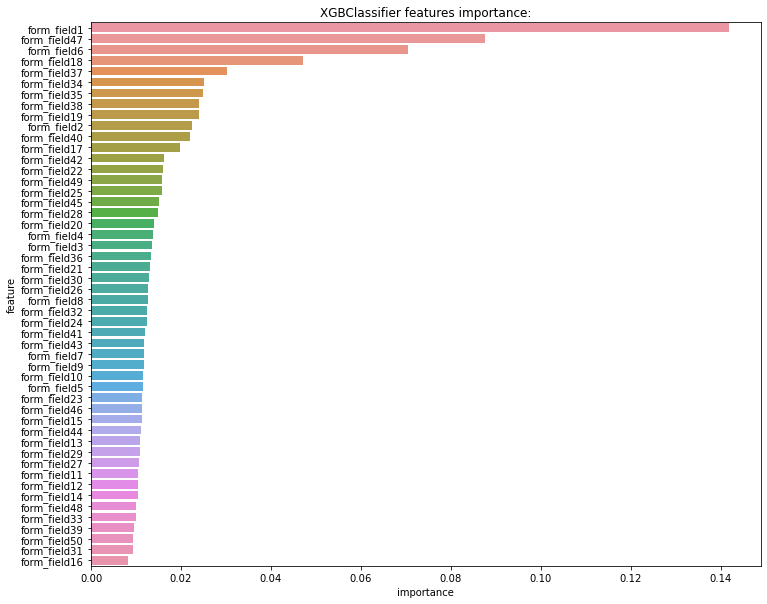

In [69]:
feature_importance_df = pd.DataFrame(model1.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = features

plt.figure(figsize=(12, 10));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(50))
plt.title('XGBClassifier features importance:');

### XGB without form_field 49 and 49

In [70]:
score_list = []
score = 0
test_oofs = []
 
for i, (train_index, val_index) in enumerate(skf.split(X, y)):
    
    X_train, y_train = X.loc[train_index, features1], y.loc[train_index]
    X_val, y_val = X.loc[val_index, features1], y.loc[val_index]
 
    #model = CatBoostClassifier(**params, task_type='GPU',random_seed = i, verbose=0)
   # model = AdaBoostClassifier(base_estimator=CatBoostClassifier( task_type='GPU',random_seed = i))
    #model = StackingClassifier(estimators=[('cat',CatBoostClassifier(**params, task_type='GPU',random_seed = i)), ('cat1',CatBoostClassifier(task_type='GPU',random_seed = i))])    
    model2 = XGBClassifier( tree_method ='gpu_hist', gpu_id= 0,
                          verbosity =0, booster ='gbtree',
                           random_state=i
                          )
    #model = StackingClassifier([('cat', cat), ('xgb', xgb), ('lgb', lgb)])                          
    #model = XGBClassifier()
    model2.fit(X_train, y_train)
    #model.fit(xtrain, ytrain)
    
    
    p = model2.predict_proba(X_val)[:, 1]
    sc = eval_metric(y_val, p)
    score_list.append(sc)
    score += sc/folds
    
    pred = model2.predict_proba(test[features1])[:, 1]
    test_oofs.append(pred)
 
    print('Fold {} : {}'.format(i, sc))
 
print()
print()
print('Avg log : ', score)

Fold 0 : 0.822944591363961
Fold 1 : 0.8331502516661466
Fold 2 : 0.8259620325014372
Fold 3 : 0.8198114198461908
Fold 4 : 0.8267954292191442
Fold 5 : 0.8274584989422177
Fold 6 : 0.8060233249942768
Fold 7 : 0.8288735584786692
Fold 8 : 0.8464017820941053
Fold 9 : 0.8358168919683023


Avg log :  0.8273237781074452


In [71]:
oof_prediction = pd.DataFrame(test_oofs).T
oof_prediction.columns = ['fold_'+ str(i) for i in range(1, folds + 1)]
sub['default_status'] = np.mean(test_oofs, axis = 0)
sub.to_csv('model2.csv', index = False)


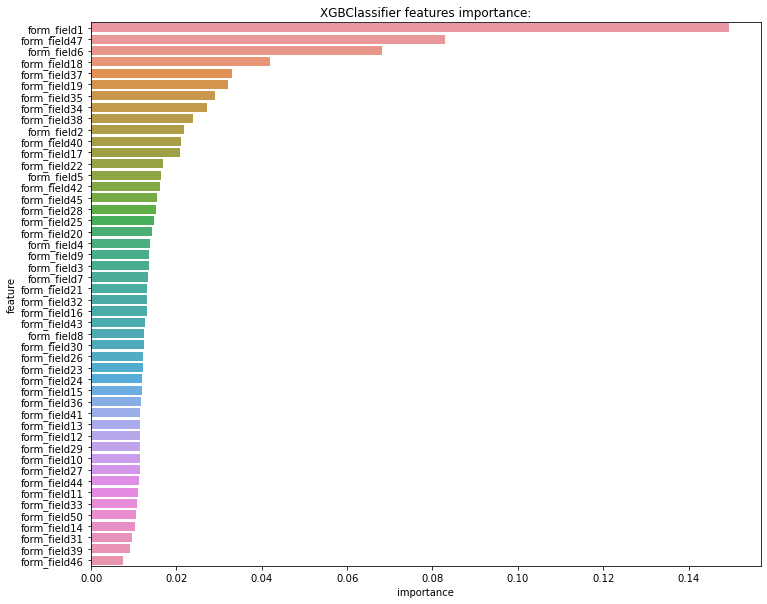

In [72]:
feature_importance_df = pd.DataFrame(model2.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = features1

plt.figure(figsize=(12, 10));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(50))
plt.title('XGBClassifier features importance:');

### XGB tunned without form_field 49 and 49

In [73]:
score_list = []
score = 0
test_oofs = []
 
for i, (train_index, val_index) in enumerate(skf.split(X, y)):
    
    X_train, y_train = X.loc[train_index, features1], y.loc[train_index]
    X_val, y_val = X.loc[val_index, features1], y.loc[val_index]
 
    #model = CatBoostClassifier(**params, task_type='GPU',random_seed = i, verbose=0)
   # model = AdaBoostClassifier(base_estimator=CatBoostClassifier( task_type='GPU',random_seed = i))
    #model = StackingClassifier(estimators=[('cat',CatBoostClassifier(**params, task_type='GPU',random_seed = i)), ('cat1',CatBoostClassifier(task_type='GPU',random_seed = i))])    
    model3 = XGBClassifier(**xgb_params, 
                           random_state=i
                          )
    #model = StackingClassifier([('cat', cat), ('xgb', xgb), ('lgb', lgb)])                          
    #model = XGBClassifier()
    model3.fit(X_train, y_train)
    #model.fit(xtrain, ytrain)
    
    
    p = model3.predict_proba(X_val)[:, 1]
    sc = eval_metric(y_val, p)
    score_list.append(sc)
    score += sc/folds
    
    pred = model3.predict_proba(test[features1])[:, 1]
    test_oofs.append(pred)
 
    print('Fold {} : {}'.format(i, sc))
 
print()
print()
print('Avg log : ', score)

Fold 0 : 0.8259939402813989
Fold 1 : 0.8382851620716877
Fold 2 : 0.8284331607036199
Fold 3 : 0.8203424687894482
Fold 4 : 0.8327000932569547
Fold 5 : 0.8359422191636487
Fold 6 : 0.8074815681104176
Fold 7 : 0.8291604146726942
Fold 8 : 0.8462250828159349
Fold 9 : 0.8400181974398087


Avg log :  0.8304582307305614


In [74]:
oof_prediction = pd.DataFrame(test_oofs).T
oof_prediction.columns = ['fold_'+ str(i) for i in range(1, folds + 1)]
sub['default_status'] = np.mean(test_oofs, axis = 0)
sub.to_csv('model3.csv', index = False)


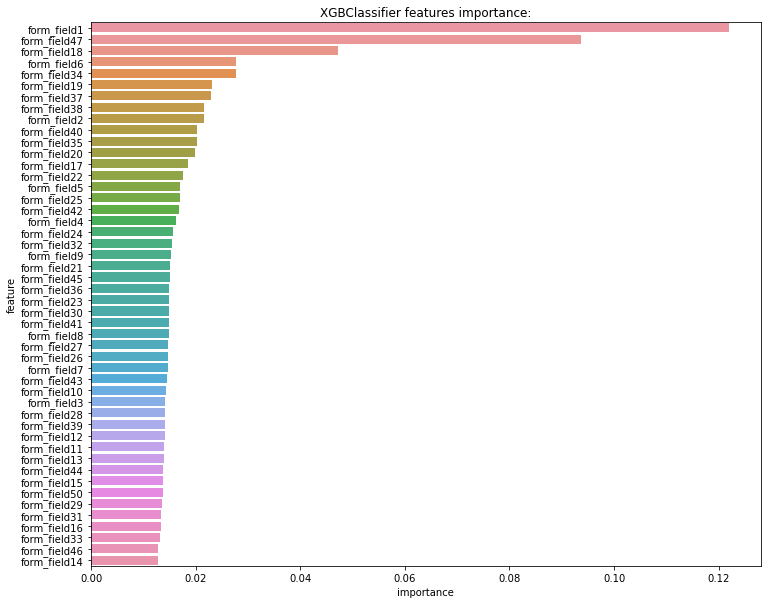

In [75]:
feature_importance_df = pd.DataFrame(model3.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = features1

plt.figure(figsize=(12, 10));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(50))
plt.title('XGBClassifier features importance:');

**LGBClassifier tunned model without feature 48 and 49**

In [76]:
score_list = []
score = 0
test_oofs = []
 
for i, (train_index, val_index) in enumerate(skf.split(X, y)):
    
    X_train, y_train = X.loc[train_index, features1], y.loc[train_index]
    X_val, y_val = X.loc[val_index, features1], y.loc[val_index]
 
    #model = CatBoostClassifier(**params, task_type='GPU',random_seed = i, verbose=0)
   # model = AdaBoostClassifier(base_estimator=CatBoostClassifier( task_type='GPU',random_seed = i))
    #model = StackingClassifier(estimators=[('cat',CatBoostClassifier(**params, task_type='GPU',random_seed = i)), ('cat1',CatBoostClassifier(task_type='GPU',random_seed = i))])    
    model4 = LGBMClassifier( n_estimator = 3000, learning_rate = 0.01,
                           random_state=i
                          )
    #model = StackingClassifier([('cat', cat), ('xgb', xgb), ('lgb', lgb)])                          
    #model = XGBClassifier()
    model4.fit(X_train, y_train)
    #model.fit(xtrain, ytrain)
    
    
    p = model4.predict_proba(X_val)[:, 1]
    sc = eval_metric(y_val, p)
    score_list.append(sc)
    score += sc/folds
    
    pred = model4.predict_proba(test[features1])[:, 1]
    test_oofs.append(pred)
 
    print('Fold {} : {}'.format(i, sc))
 
print()
print()
print('Avg log : ', score)

Fold 0 : 0.8154441071418408
Fold 1 : 0.8310236412503089
Fold 2 : 0.8250869831952934
Fold 3 : 0.8183994574642559
Fold 4 : 0.826995154674257
Fold 5 : 0.8290708583068312
Fold 6 : 0.8078611698767898
Fold 7 : 0.8255668685233251
Fold 8 : 0.8452452206724018
Fold 9 : 0.8316829046120409


Avg log :  0.8256376365717345


In [77]:
oof_prediction = pd.DataFrame(test_oofs).T
oof_prediction.columns = ['fold_'+ str(i) for i in range(1, folds + 1)]
sub['default_status'] = np.mean(test_oofs, axis = 0)
sub.to_csv('model4.csv', index = False)


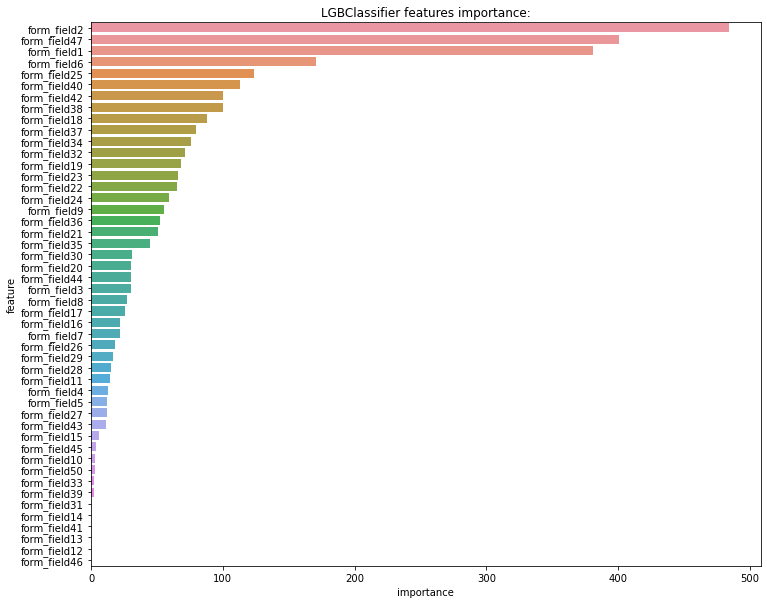

In [78]:
feature_importance_df = pd.DataFrame(model4.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = features1

plt.figure(figsize=(12, 10));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(50))
plt.title('LGBClassifier features importance:');

### LGB without form_field 48 n 49

In [79]:
score_list = []
score = 0
test_oofs = []
 
for i, (train_index, val_index) in enumerate(skf.split(X, y)):
    
    X_train, y_train = X.loc[train_index, features1], y.loc[train_index]
    X_val, y_val = X.loc[val_index, features1], y.loc[val_index]
 
    #model = CatBoostClassifier(**params, task_type='GPU',random_seed = i, verbose=0)
   # model = AdaBoostClassifier(base_estimator=CatBoostClassifier( task_type='GPU',random_seed = i))
    #model = StackingClassifier(estimators=[('cat',CatBoostClassifier(**params, task_type='GPU',random_seed = i)), ('cat1',CatBoostClassifier(task_type='GPU',random_seed = i))])    
    model5 = LGBMClassifier( 
                           random_state=i
                          )
    #model = StackingClassifier([('cat', cat), ('xgb', xgb), ('lgb', lgb)])                          
    #model = XGBClassifier()
    model5.fit(X_train, y_train)
    #model.fit(xtrain, ytrain)
    
    
    p = model5.predict_proba(X_val)[:, 1]
    sc = eval_metric(y_val, p)
    score_list.append(sc)
    score += sc/folds
    
    pred = model5.predict_proba(test[features1])[:, 1]
    test_oofs.append(pred)
 
    print('Fold {} : {}'.format(i, sc))
 
print()
print()
print('Avg log : ', score)

Fold 0 : 0.8282616348270141
Fold 1 : 0.8439537085377803
Fold 2 : 0.8377501462152457
Fold 3 : 0.8313199524177387
Fold 4 : 0.8393775292305448
Fold 5 : 0.8408935053275264
Fold 6 : 0.8194168716952925
Fold 7 : 0.8384108373718457
Fold 8 : 0.85406828970269
Fold 9 : 0.8432753254024952


Avg log :  0.8376727800728173


In [80]:
oof_prediction = pd.DataFrame(test_oofs).T
oof_prediction.columns = ['fold_'+ str(i) for i in range(1, folds + 1)]
sub['default_status'] = np.mean(test_oofs, axis = 0)
sub.to_csv('model5.csv', index = False)


### CatBoost tunned

In [81]:
score_list = []
score = 0
test_oofs = []
 
for i, (train_index, val_index) in enumerate(skf.split(X, y)):
    
    X_train, y_train = X.loc[train_index, features], y.loc[train_index]
    X_val, y_val = X.loc[val_index, features], y.loc[val_index]
 
    model6 = CatBoostClassifier(**cat_params, task_type='GPU',random_seed = i, verbose=0)
   # model = AdaBoostClassifier(base_estimator=CatBoostClassifier( task_type='GPU',random_seed = i))
    #model = StackingClassifier(estimators=[('cat',CatBoostClassifier(**params, task_type='GPU',random_seed = i)), ('cat1',CatBoostClassifier(task_type='GPU',random_seed = i))])    
    
    #model = StackingClassifier([('cat', cat), ('xgb', xgb), ('lgb', lgb)])                          
    #model = XGBClassifier()
    model6.fit(X_train, y_train)
    #model.fit(xtrain, ytrain)
    
    
    p = model6.predict_proba(X_val)[:, 1]
    sc = eval_metric(y_val, p)
    score_list.append(sc)
    score += sc/folds
    
    pred = model6.predict_proba(test[features])[:, 1]
    test_oofs.append(pred)
 
    print('Fold {} : {}'.format(i, sc))
 
print()
print()
print('Avg log : ', score)

Fold 0 : 0.8336592238751601
Fold 1 : 0.8479506322828432
Fold 2 : 0.840778711957087
Fold 3 : 0.8344225959514375
Fold 4 : 0.8428393508819225
Fold 5 : 0.8405803597287002
Fold 6 : 0.8199510206839865
Fold 7 : 0.8428665898039173
Fold 8 : 0.8542255089628771
Fold 9 : 0.8472625230657204


Avg log :  0.8404536517193653


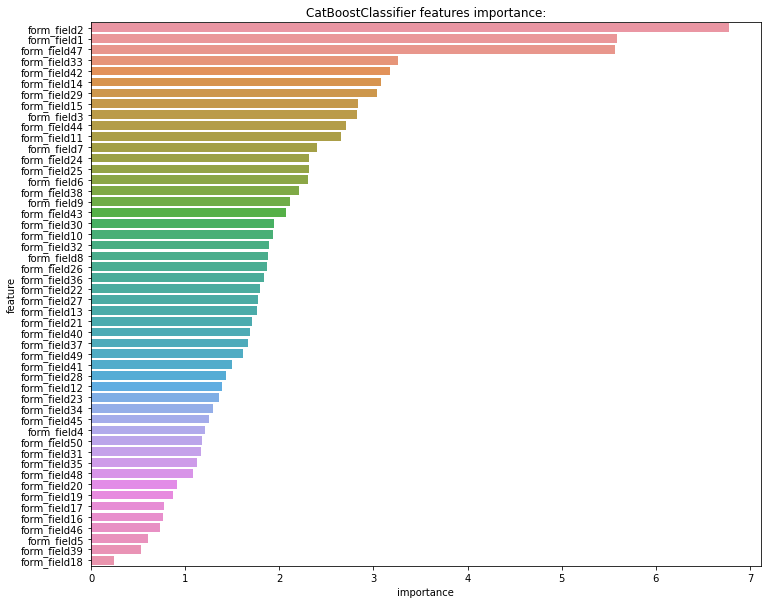

In [82]:
feature_importance_df = pd.DataFrame(model6.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = features

plt.figure(figsize=(12, 10));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(50))
plt.title('CatBoostClassifier features importance:');

In [83]:
oof_prediction = pd.DataFrame(test_oofs).T
oof_prediction.columns = ['fold_'+ str(i) for i in range(1, folds + 1)]
sub['default_status'] = np.mean(test_oofs, axis = 0)
sub.to_csv('model6.csv', index = False)


My best submission on LB is a blend of Catboost, Lgbm and xgb